In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataparsing
import batteryData
import seaborn as sns

In [ ]:
#Load all battery data files
filenames = ['B0005.mat', 'B0006.mat', 'B0007.mat', 'B0018.mat']
batteries = {fname.split('.')[0]: dataparsing.load_mat_file(fname) for fname in filenames}

In [3]:
#Get all battery capacities in a single DataFrame
BatteryCapacityAll_df = batteryData.getAllBatteryCapacities(batteries)

In [4]:
print(BatteryCapacityAll_df.head())

   cycle number  capacity batteryID
0             1  1.856487     B0005
1             2  1.846327     B0005
2             3  1.835349     B0005
3             4  1.835263     B0005
4             5  1.834646     B0005


### Plot of Degradation Capacity

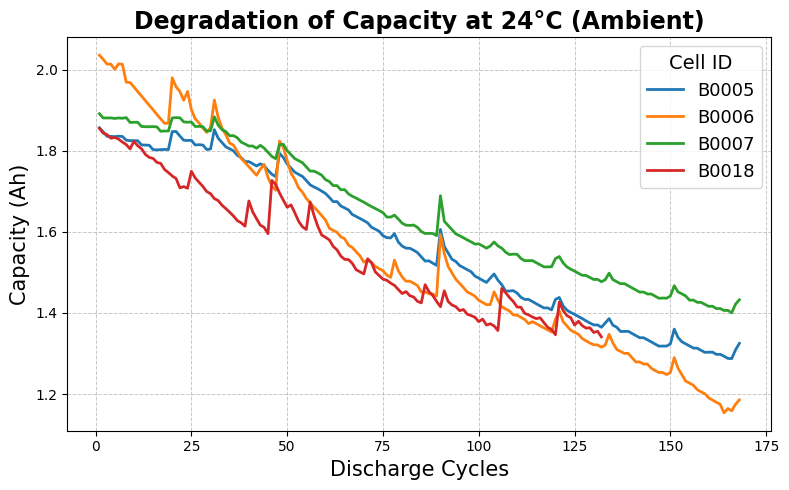

In [5]:
import batteryPlots
batteryPlots.degradation_capacity_plot(BatteryCapacityAll_df,'capacity','Discharge Cycles','Capacity (Ah)','Degradation of Capacity at 24°C (Ambient)')

From this graph, it is relevant that battery capacity is degrading over each cycles.

### SOH over the cycles

   cycle number  capacity batteryID        Q0         SOH
0             1  1.856487     B0005  1.856487  100.000000
1             2  1.846327     B0005  1.856487   99.452721
2             3  1.835349     B0005  1.856487   98.861386
3             4  1.835263     B0005  1.856487   98.856718
4             5  1.834646     B0005  1.856487   98.823482


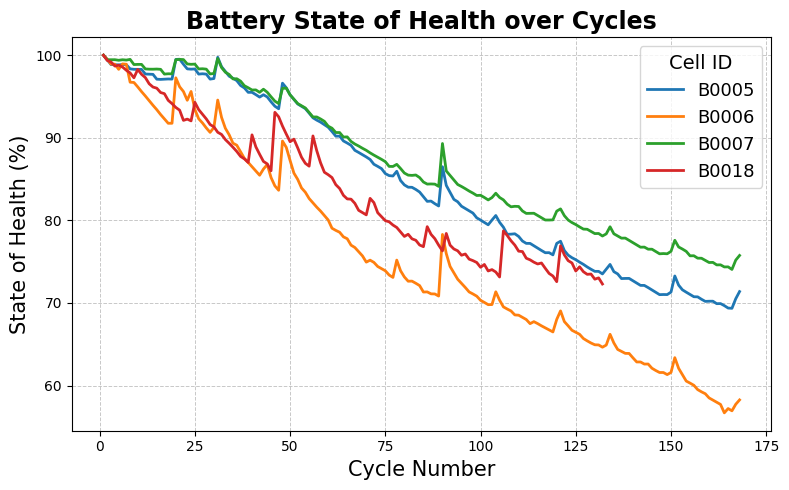

In [6]:
#SOH calculation
BatteryCapacityAll_df['Q0'] = BatteryCapacityAll_df.groupby('batteryID')['capacity'].transform('first')
BatteryCapacityAll_df['SOH'] = BatteryCapacityAll_df['capacity']/BatteryCapacityAll_df['Q0']*100
print(BatteryCapacityAll_df.head())
batteryPlots.degradation_capacity_plot(BatteryCapacityAll_df,'SOH','Cycle Number','State of Health (%)','Battery State of Health over Cycles')

## RUL

   cycle number  capacity batteryID        Q0         SOH  RUL
0             1  1.856487     B0005  1.856487  100.000000  167
1             2  1.846327     B0005  1.856487   99.452721  166
2             3  1.835349     B0005  1.856487   98.861386  165
3             4  1.835263     B0005  1.856487   98.856718  164
4             5  1.834646     B0005  1.856487   98.823482  163


C:\Users\soora\AppData\Local\Temp\ipykernel_31768\1280373980.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(batteryData.compute_rul_for_cell, eol_threshold=eol_threshold))


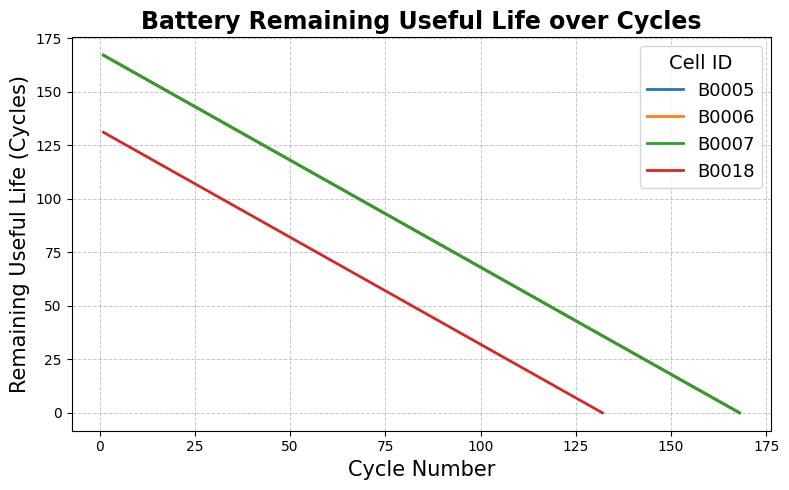

In [ ]:
eol_threshold = 0.8   # 80% SOH
batteryData.compute_rul_for_cell(BatteryCapacityAll_df, eol_threshold)
BatteryCapacityAll_df = (BatteryCapacityAll_df.groupby('batteryID', group_keys=False).apply(batteryData.compute_rul_for_cell, eol_threshold=eol_threshold))

print(BatteryCapacityAll_df.head())
batteryPlots.degradation_capacity_plot(BatteryCapacityAll_df,'RUL','Cycle Number','Remaining Useful Life (Cycles)','Battery Remaining Useful Life over Cycles')

In [ ]:
#Save processed data to CSV
BatteryCapacityAll_df.to_csv('Batterydata.csv', index=False)

## Battery voltage, current, temperature and charge voltage vs time

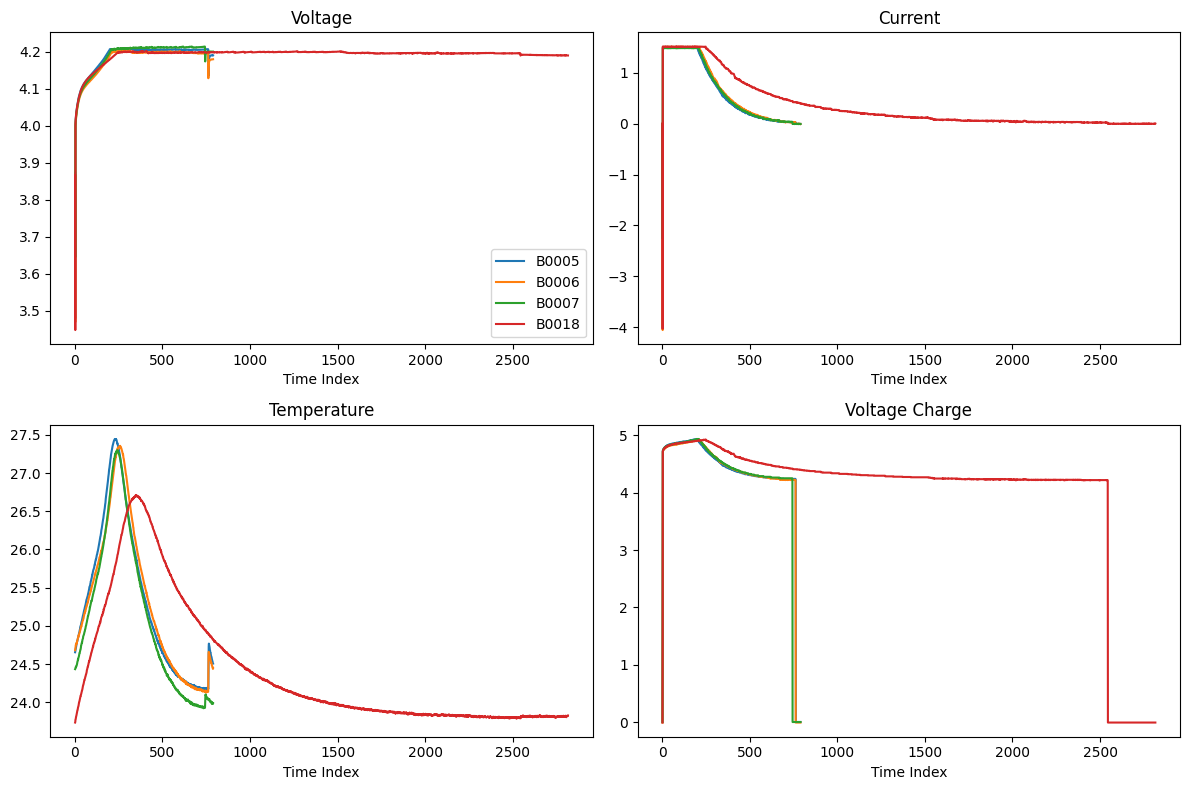

In [13]:
batteryPlots.quickPlotAll(batteries)

## Battery discharge data to csv

In [ ]:
all_data = []

# Loop through all batteries and collect data
for battery in batteries:
    data = batteryData.getChargingValues(batteries, battery, 0)
    
    # Create temporary DataFrame for this battery
    temp_df = pd.DataFrame({
        'Index': data[0],
        'Voltage_measured': data[1],
        'Current_measured': data[2],
        'Temperature_measured': data[3],
        'Voltage_charge': data[4],
        'Time': data[5],
        'Battery_ID': battery  # Add battery name column
    })
    
    all_data.append(temp_df)

# Combine all batteries into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Export to single CSV
combined_df.to_csv('all_batteries_cycle_0_charging_data.csv', index=False)
print(f"Combined CSV created with {len(combined_df)} total rows from {len(battery)} batteries!")
print("\nFirst few rows:")
print(combined_df.head())
print("\nBattery distribution:")
print(combined_df['Battery_ID'].value_counts())


## Battery voltage, current, temperature and load voltage vs time

In [ ]:
#battery charge data to csv